# Support Vector Machines
This notebook is my copy of executing the examples in the *Chapter 5: Support Vector Machines* of **Hands-on Machine Learning with Scikit-Learn, Keras and Tensorflow**

In [1]:
%pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=e3ce71e8b676c622e102af0c8640268d94b24c2c53560ca063af795b42175dca
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


## Example 1: Using LinearSVC class to use SVM for classification on iris dataset to detect *Iris virginica* flowers

### Import necessary modules

In [2]:
from sklearn.datasets import load_iris # for loading the iris dataset
from sklearn.pipeline import make_pipeline # to create the model pipeline for SVM classifier
from sklearn.preprocessing import StandardScaler # to perform feature scaling
from sklearn.svm import LinearSVC # the Linear Support Vector Machine classifier

### Load the dataset

In [10]:
iris_dataset = load_iris(as_frame=True) # load the iris dataset as a Pandas dataframe
# Use iris_dataset.data.head() to view details about the dataset such as column names
X = iris_dataset.data[["petal length (cm)", "petal width (cm)"]].values # get the values for these 2 features as the data
# Use iris_dataset.target_names to see the names of the target classes and their index (this is the target label)
y = (iris_dataset.target == 2) # virginica is at index 2 in the target_names array and 2 is the target label for virginica flowers in this dataset

### Build the pipeline

In [11]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42)) # In this pipeline, first StandardScaler applies feature scaling to the dataset and then LinearSVC classifier is declared with hyperparameter 'C' that determines the width of the street in SVM classification and a random seed
svm_clf.fit(X, y) # fit the training data based on this classifier pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

### Make predictions

In [12]:
X_new = [[5.5, 1.7], [5.0, 1.5], [4.5, 0.8]] # Three new samples with each sample a list of ["petal length (cm)", "petal width (cm)"] values
svm_clf.predict(X_new) # Generate True/False predictions on this new sample dataset

array([ True, False, False])

In [13]:
svm_clf.decision_function(X_new) # These scores represent the signed distance between each instance and the decision boundary

array([ 0.66163411, -0.22036063, -2.22597774])

## Example 2: Use PolynomialFeatures transformer to add more polynomial features to a linearly non-separable dataset (nonlinear dataset) to make it linearly separable

### Import necessary modules

In [24]:
from sklearn.datasets import make_moons # this dataset is used for binary classification and it generates the data points shaped as two interleaving crescent moons
from sklearn.preprocessing import PolynomialFeatures # the transformer that adds polynomial features
from matplotlib import pyplot as plt # To plot the make_moons dataset
from mlxtend.plotting import plot_decision_regions # To plot the SVM classifier's decision boundary

### Load dataset

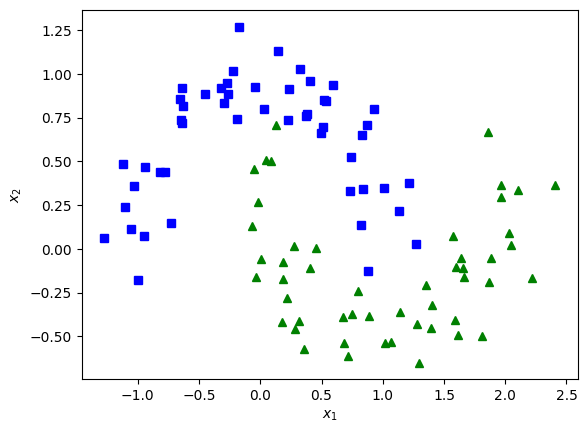

In [30]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42) # Generates 100 samples
# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

# X contains two features, x1 and x2
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Displaying the plot.
plt.show()

### Build pipeline

In [31]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

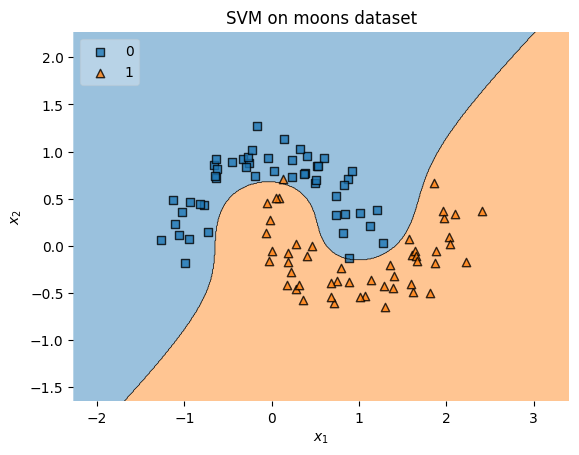

In [32]:
plot_decision_regions(X, y, clf=polynomial_svm_clf, legend=2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('SVM on moons dataset')
plt.show()

## Example 3: Use SVC class to classify nonlinear dataset using the "kernel trick"

### Import necessary modules

In [33]:
from sklearn.svm import SVC

### Build pipeline (we are using moons dataset as before)

In [38]:
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5)) # degree -> represents what degree polynomial features to add, coef0 -> how much model is influenced by high-degree terms v/s low-degree
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

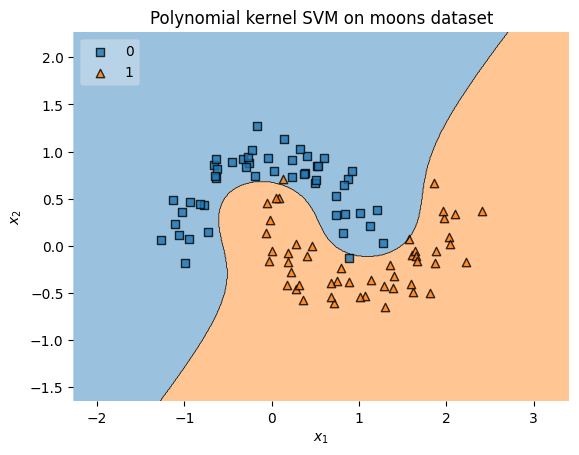

In [40]:
plot_decision_regions(X, y, clf=poly_kernel_svm_clf, legend=2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Polynomial kernel SVM on moons dataset')
plt.show()

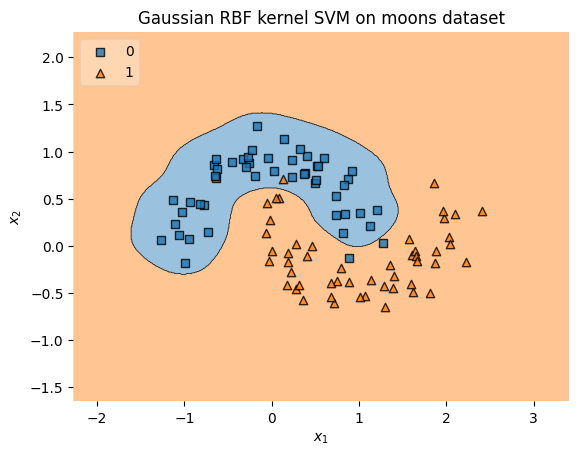

In [42]:
# Gaussian RBF kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=0.001)) # gamma -> the width of the bell shaped curve, the larger the gamma, the narrower the curve and thus smaller influence of every training instance on others instances.
rbf_kernel_svm_clf.fit(X, y)

plot_decision_regions(X, y, clf=rbf_kernel_svm_clf, legend=2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gaussian RBF kernel SVM on moons dataset')
plt.show()

## Example 4: Using SVM for regression tasks

Objective: try to fit as many instances **on** the street as possible while limiting margin violations (instances *off* the street). Thus, the width of the street is the hyperparameter controlled by **ε**. Reducing the value of ε reduces width of the street, increases the support vectors and thus regularizes the model. Use the **LinearSVR** class to perform linear SVM regression.

### Import necessary modules

In [99]:
from sklearn.svm import LinearSVR, SVR
import numpy as np

### Build dataset

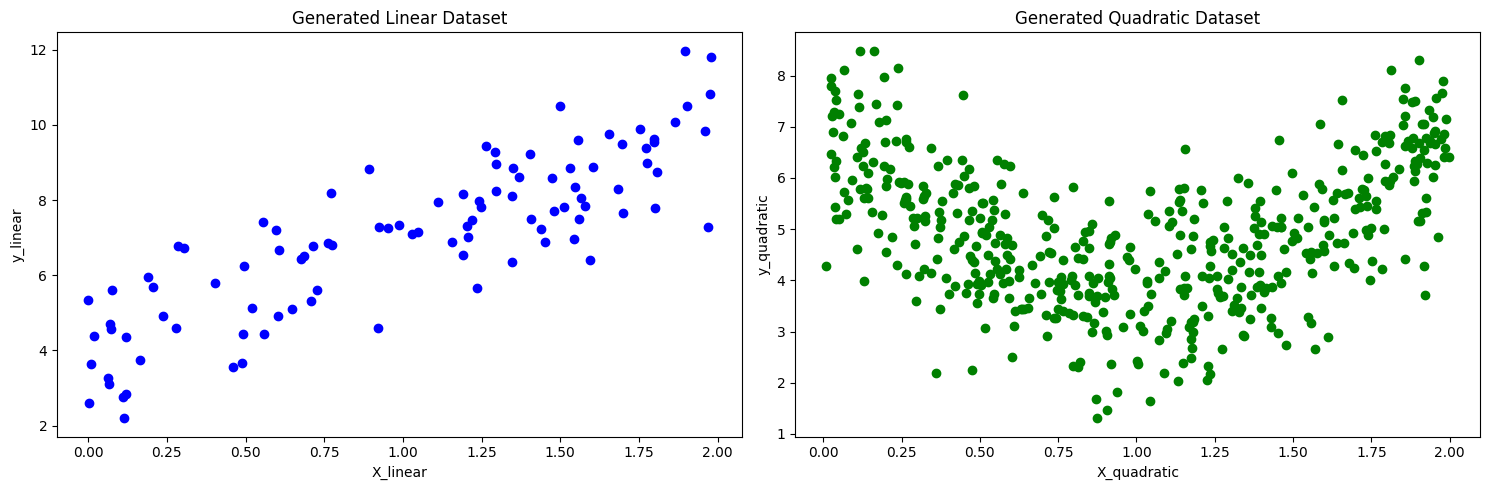

In [100]:
n_samples = 100
X_linear = 2 * np.random.rand(n_samples, 1)
y_linear = 4 + 3 * X_linear.ravel() + np.random.randn(n_samples)  # Ensure y_linear is a 1D array

np.random.seed(0)  # For reproducibility
X_quadratic = 2 * np.random.rand(n_samples * 5, 1)
y_quadratic = 4 + 3 * (X_quadratic.ravel() - 1)**2 + np.random.randn(n_samples * 5)  # Quadratic relationship

# Plotting the generated datasets
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the first subplot
axes[0].scatter(X_linear, y_linear, color='blue')
axes[0].set_title('Generated Linear Dataset')
axes[0].set_xlabel('X_linear')
axes[0].set_ylabel('y_linear')
axes[0].grid(False)

# Plot the second subplot
axes[1].scatter(X_quadratic, y_quadratic, color='green')
axes[1].set_title('Generated Quadratic Dataset')
axes[1].set_xlabel('X_quadratic')
axes[1].set_ylabel('y_quadratic')
axes[1].grid(False)

# Display the plot with two subplots
plt.tight_layout()  # Adjust the layout so the plots fit nicely
plt.show()

### Build pipeline

In [101]:
svm_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X_linear, y_linear)

svm_poly_reg = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=100, epsilon=0.1))
svm_poly_reg.fit(X_quadratic, y_quadratic)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, degree=2, kernel='poly'))])

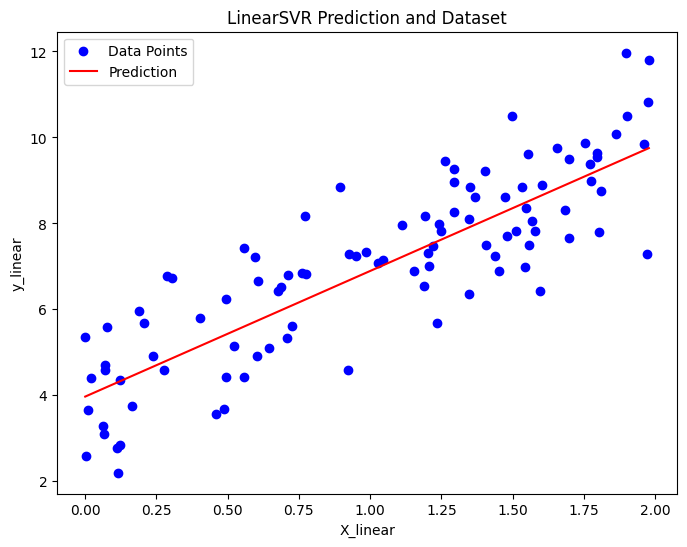

In [102]:
# For linear dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_linear, y_linear, color='blue', label='Data Points')

# Predict using the model for a range of X values
X_range = np.linspace(X_linear.min(), X_linear.max(), 200).reshape(-1, 1)
y_range_pred = svm_reg.predict(X_range)

plt.plot(X_range, y_range_pred, color='red', label='Prediction')
plt.title('LinearSVR Prediction and Dataset')
plt.xlabel('X_linear')
plt.ylabel('y_linear')
plt.legend()
plt.grid(False)
plt.show()


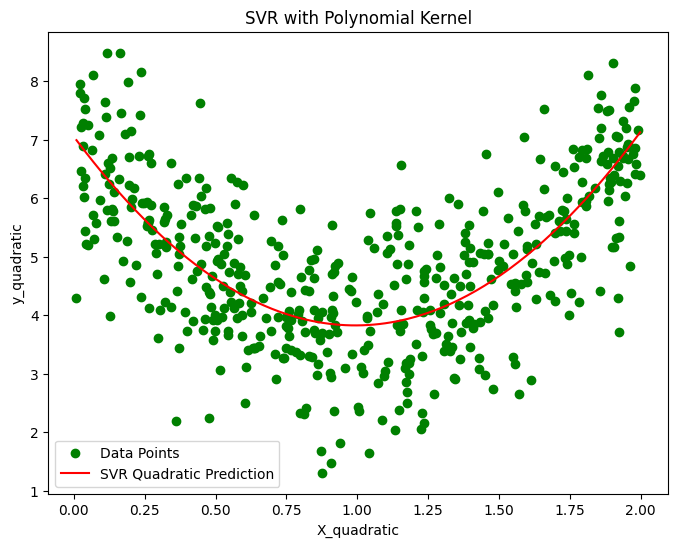

In [103]:
# For quadratic dataset
X_range = np.linspace(X_quadratic.min(), X_quadratic.max(), 200).reshape(-1, 1)
y_range_pred = svm_poly_reg.predict(X_range)

# Plot the dataset and the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_quadratic, y_quadratic, color='green', label='Data Points')
plt.plot(X_range, y_range_pred, color='red', label='SVR Quadratic Prediction')
plt.title('SVR with Polynomial Kernel')
plt.xlabel('X_quadratic')
plt.ylabel('y_quadratic')
plt.legend()
plt.grid(False)
plt.show()
